<a href="https://colab.research.google.com/github/Jerethecreator/ml-course/blob/master/jgisembalesson2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install scikit-learn==0.24.2


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 22.3 MB 1.4 MB/s 
  Attempting uninstall: scikit-learn
    Found existing installation: scikit-learn 1.0.2
    Uninstalling scikit-learn-1.0.2:
      Successfully uninstalled scikit-learn-1.0.2
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
yellowbrick 1.5 requires scikit-learn>=1.0.0, but you have scikit-learn 0.24.2 which is incompatible.


In [ ]:
import numpy as np 
import sklearn
# we used the library sklearn here only to load the data

# You dont have to care about matplotlib for now
import matplotlib.pyplot as plt

# load data from sklearn
from sklearn.datasets import load_boston
data = load_boston()


In [ ]:
print(data.keys())
X= data.data
y = data.target
feature_names = data.feature_names
print('data.data :{0}, data.target: {1}, num_features: {2}'.format(X.shape, y.shape, len(feature_names)))
print('num_datapoints : {}'.format(X.shape[0]))

dict_keys(['data', 'target', 'feature_names', 'DESCR', 'filename'])
data.data :(506, 13), data.target: (506,), num_features: 13
num_datapoints : 506


In [ ]:
# https://scipy-lectures.org/packages/scikit-learn/auto_examples/plot_boston_prediction.html
def label_histogram():
    plt.figure(figsize=(6, 5))
    plt.hist(y)
    plt.xlabel('price ($1000s)')
    plt.ylabel('count')
    plt.tight_layout()

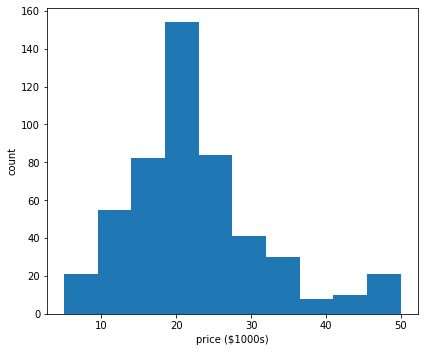

In [ ]:

label_histogram()

In [ ]:
## PLOTING PRCIES AGAINST EACH FEATURE
def price_single_feature_ploting(input_data, feature_names):
    fig, axes = plt.subplots(5, 3, figsize = (15, 15))
    plt.subplots_adjust(bottom=0.1, right=0.8, top=0.9)
    for index, (ax, feature_name) in enumerate(zip(axes.flat[:-2],feature_names)): 
        ax.scatter(input_data[:, index], y)
        ax.set(xlabel=feature_name, ylabel='Price')

In [ ]:
price_single_feature_ploting(X, feature_names)

In [3]:
def training(X, y):
  model = LinearRegression()
  model.fit(X,y)
  return model.coef_,model.intercept_st

In [4]:
def prediction(X, coefficients, intercept):
    model=LinearRegression()
    model.fit(X,y)
    y_predict= model.predict(X)
    return y_predict

In [5]:
def MSE(X, y_target, coefficients, intercept):
  y_predict =prediction(X, coefficients, intercept)
  assert len(y_predict) == len(y_target)
  MSE =mean_squared_error(y_target,y_predict)
  return MSE

In [8]:
def visualize_results(y_predict, y_target):
    """ this function plot your y_predict and y_predict to see how closed they are"""
    
    plt.figure(figsize=(5, 4))
    plt.scatter(y_target, y_predict)
    plt.plot([0, 50], [0, 50], '--k')
    plt.axis('tight')
    plt.xlabel('True price ($1000s)')
    plt.ylabel('Predicted price ($1000s)')
    plt.tight_layout()

In [ ]:
visualize_results(prediction(X, coefficients, intercept), y)